In [1]:
%matplotlib inline
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
ROOT_FOLDER = os.path.abspath('.')
output_folder = '{}/output'.format(ROOT_FOLDER)
with open('{}/base_params.pkl'.format(output_folder), 'rb') as f:
    base_params = pickle.load(f)

Text(0.5,0.98,'Visualization of the templates used')

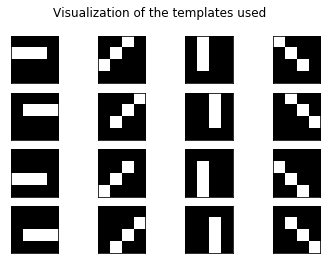

In [3]:
linelet_templates = base_params['linelet_templates']
n_templates = len(linelet_templates)
sqrt_n = int(np.sqrt(n_templates))
fig, ax = plt.subplots(sqrt_n, sqrt_n)
for ii in range(sqrt_n):
    for jj in range(sqrt_n):
        ax[ii, jj].imshow(linelet_templates[ii * sqrt_n + jj], cmap='gray')
        ax[ii, jj].get_xaxis().set_visible(False)
        ax[ii, jj].get_yaxis().set_visible(False)

fig.suptitle('Visualization of the templates used')

In [4]:
cases = ['mid_only', 'mid_and_img']
log_prob_evolution = {}
final_state = {}
for case in cases:
    with open('{}/{}/results.pkl'.format(output_folder, case), 'rb') as f:
        results = pickle.load(f)
        log_prob_evolution[case] = results['log_prob_evolution']
        state = results['training_evolution'][-1]
        for ii in range(2):
            state['mid'][ii] = np.exp(state['mid'][ii]) / np.sum(np.exp(state['mid'][ii]))
        
        if case == 'mid_and_img':
            state['img'] = np.exp(state['img']) / np.sum(np.exp(state['img']), axis=1, keepdims=True)
        
        state['img'] = state['img'][:, 1].reshape((base_params['image_dimension'], base_params['image_dimension']))
        final_state[case] = state

Text(0.5,1,'Evolution of log probability during training')

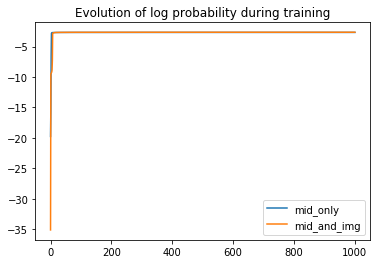

In [5]:
fig, ax = plt.subplots(1, 1)
for case in cases:
    ax.plot(np.arange(base_params['n_iters'] + 1), log_prob_evolution[case], label=case)

ax.legend()
ax.set_title('Evolution of log probability during training')

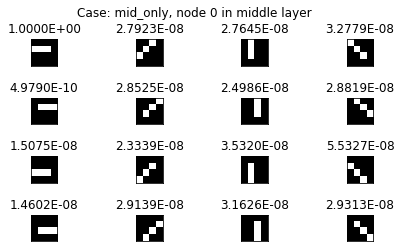

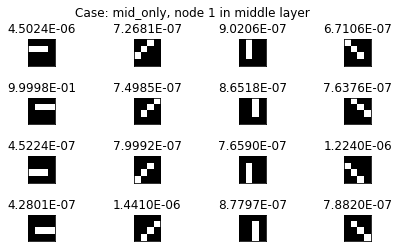

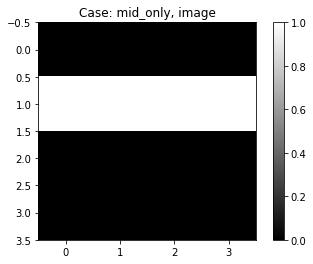

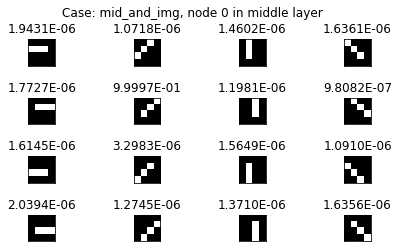

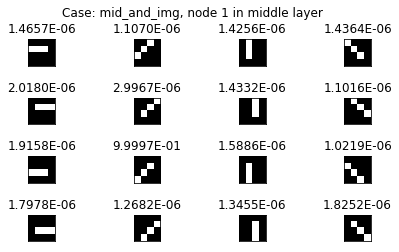

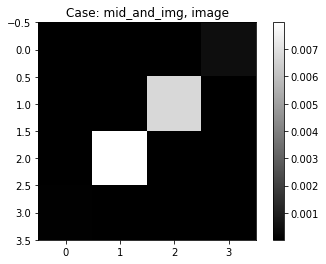

In [6]:
for case in ['mid_only', 'mid_and_img']:
    for kk in range(2):
        fig, ax = plt.subplots(sqrt_n, sqrt_n)
        fig.suptitle('Case: {}, node {} in middle layer'.format(case, kk))
        fig.tight_layout(rect=[0, 0.07, 1, 0.92])
        for ii in range(sqrt_n):
            for jj in range(sqrt_n):
                ind = ii * sqrt_n + jj
                ax[ii, jj].imshow(linelet_templates[ind], cmap='gray')
                ax[ii, jj].get_xaxis().set_visible(False)
                ax[ii, jj].get_yaxis().set_visible(False)
                ax[ii, jj].set_title('{:.4E}'.format(final_state[case]['mid'][kk][ind + 1]))
    
    fig, ax = plt.subplots(1, 1)
    im = ax.imshow(final_state[case]['img'], cmap='gray')
    ax.set_title('Case: {}, image'.format(case))
    fig.colorbar(im)